In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('movies.csv')

#Data cleansing

##1- Understand the Dataset

In [ ]:
print(f"Dataset Shape:\n{df.shape}")

Dataset Shape:
(77, 8)


In [ ]:
print(f"First 5 Rows:\n{df.head()}")

First 5 Rows:
                                 Film    Genre            Lead Studio  \
0          Zack and Miri Make a Porno  Romance  The Weinstein Company   
1                     Youth in Revolt   Comedy  The Weinstein Company   
2  You Will Meet a Tall Dark Stranger   Comedy            Independent   
3                        When in Rome   Comedy                 Disney   
4               What Happens in Vegas   Comedy                    Fox   

   Audience score %  Profitability  Rotten Tomatoes % Worldwide Gross    Year  
0              70.0       1.747542               64.0         $41.94   2008.0  
1              52.0       1.090000               68.0         $19.62   2010.0  
2              35.0       1.211818               43.0         $26.66   2010.0  
3              44.0       0.000000               15.0         $43.04   2010.0  
4              72.0       6.267647               28.0        $219.37   2008.0  


In [ ]:
print(f"Data Types:\n{df.dtypes}")

Data Types:
Film                  object
Genre                 object
Lead Studio           object
Audience score %     float64
Profitability        float64
Rotten Tomatoes %    float64
Worldwide Gross       object
Year                 float64
dtype: object


In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Numeric columns:\n{numerical_cols}")
print(f"Categorical columns:\n{categorical_cols}")

Numeric columns:
['Audience score %', 'Profitability', 'Rotten Tomatoes %', 'Year']
Categorical columns:
['Film', 'Genre', 'Lead Studio', 'Worldwide Gross']


In [ ]:
print(f"Missing Values:\n{df.isna().sum()}")

Missing Values:
Film                 0
Genre                2
Lead Studio          2
Audience score %     1
Profitability        4
Rotten Tomatoes %    1
Worldwide Gross      1
Year                 1
dtype: int64


In [ ]:
print(f"Dataset statistic Information:\n{df.describe()}")

Dataset statistic Information:
       Audience score %  Profitability  Rotten Tomatoes %         Year
count          76.00000      73.000000          76.000000    76.000000
mean           63.50000       4.613683          46.197368  2009.092105
std            13.60049       8.246150          25.888489     1.358211
min            35.00000       0.000000           3.000000  2007.000000
25%            52.00000       1.747542          26.000000  2008.000000
50%            63.50000       2.639333          44.000000  2009.000000
75%            74.50000       4.598800          63.250000  2010.000000
max            89.00000      66.934000          96.000000  2011.000000


##2- Preprocessing Steps

In [ ]:
df['Genre'] = df['Genre'].fillna('Unknown')
df['Lead Studio'] = df['Lead Studio'].fillna('Unknown')
df["Year"] = df["Year"].fillna(df["Year"].mode()[0])

df["Worldwide Gross"] = pd.to_numeric(df["Worldwide Gross"].replace('[$]', '', regex=True).str.strip()).astype(float)

fill_with_median = ["Worldwide Gross", "Profitability"]
fill_with_mean = ["Rotten Tomatoes %", "Audience score %"]

for col in fill_with_median:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

for col in fill_with_mean:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())


df['Genre'] = df['Genre'].replace({'Comdy': 'Comedy', 'Romence': 'Romance', 'romance': 'Romance'})
df['Year'] = df['Year'].astype(int)

##3- Handle Duplicates

In [ ]:
print("Number of duplicate 'Film' entries:", df['Film'].duplicated().sum())
df.drop_duplicates(subset='Film', keep='first', inplace=True)
print("Shape of the dataset after removing duplicates:", df.shape)

Number of duplicate 'Film' entries: 2
Shape of the dataset after removing duplicates: (75, 8)


##4- Feature Engineering

In [ ]:
df["Decade"] = (df["Year"] // 10 * 10).astype(str) + "s"
df["Is_Independent"] = df["Lead Studio"].str.lower().eq("independent")
df["Critic_Audience_Gap"] = df["Audience score %"] - df["Rotten Tomatoes %"]
df["ROI_Category"] = df["Profitability"].apply(lambda x: "Low" if (3.0 <= x < 6.0) else("Medium" if (6.0 <= x < 9.0) else "High"))

##5- Outlier Detection

In [ ]:
def detect_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column[(column < lower) | (column > upper)]

profit_outliers = detect_iqr(df["Profitability"])
gross_outliers = detect_iqr(df["Worldwide Gross"])

print(f"\nNumber of Profitability Outliers: {len(profit_outliers)}\nand they are:\n{profit_outliers}")
print(f"Number of Worldwide Gross Outliers: {len(gross_outliers)}\nand they are:\n{gross_outliers}")


Number of Profitability Outliers: 7
and they are:
7     11.089742
12    10.180027
14    14.196400
43     8.744706
45     9.234454
60    22.913136
68    66.934000
Name: Profitability, dtype: float64
Number of Worldwide Gross Outliers: 4
and they are:
6     521.28
11    702.17
14    709.82
45    609.47
Name: Worldwide Gross, dtype: float64


##6- Final check of the preprocessed data

In [ ]:
print("Preprocessed data info:")
print(df.info())

Preprocessed data info:
<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 0 to 76
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Film                 75 non-null     object 
 1   Genre                75 non-null     object 
 2   Lead Studio          75 non-null     object 
 3   Audience score %     75 non-null     float64
 4   Profitability        75 non-null     float64
 5   Rotten Tomatoes %    75 non-null     float64
 6   Worldwide Gross      75 non-null     float64
 7   Year                 75 non-null     int64  
 8   Decade               75 non-null     object 
 9   Is_Independent       75 non-null     bool   
 10  Critic_Audience_Gap  75 non-null     float64
 11  ROI_Category         75 non-null     object 
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 7.1+ KB
None


#Data Visualizations

In [ ]:
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-pastel')

##1- Basic Distributions

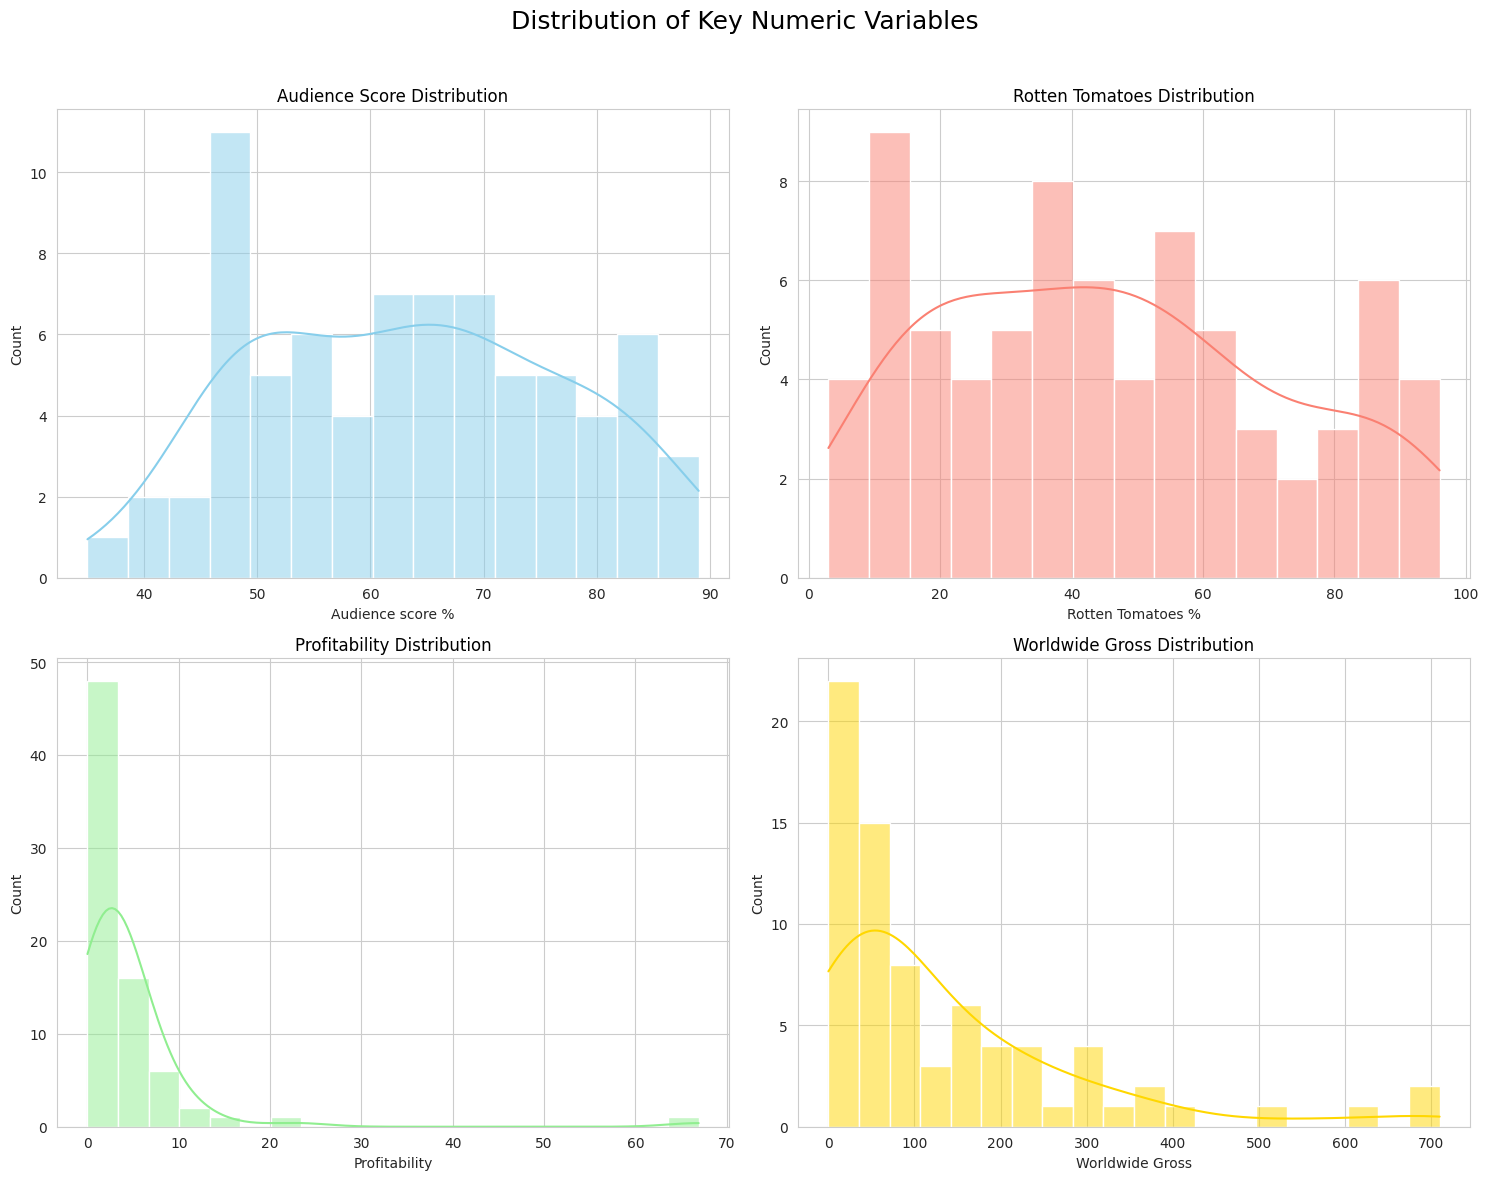

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Numeric Variables', fontsize=18, color='Black')
sns.histplot(df['Audience score %'], bins=15, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Audience Score Distribution', color='Black')
sns.histplot(df['Rotten Tomatoes %'], bins=15, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Rotten Tomatoes Distribution', color='Black')
sns.histplot(df['Profitability'], bins=20, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Profitability Distribution', color='Black')
sns.histplot(df['Worldwide Gross'], bins=20, kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Worldwide Gross Distribution', color='Black')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##2- Profitability Analysis

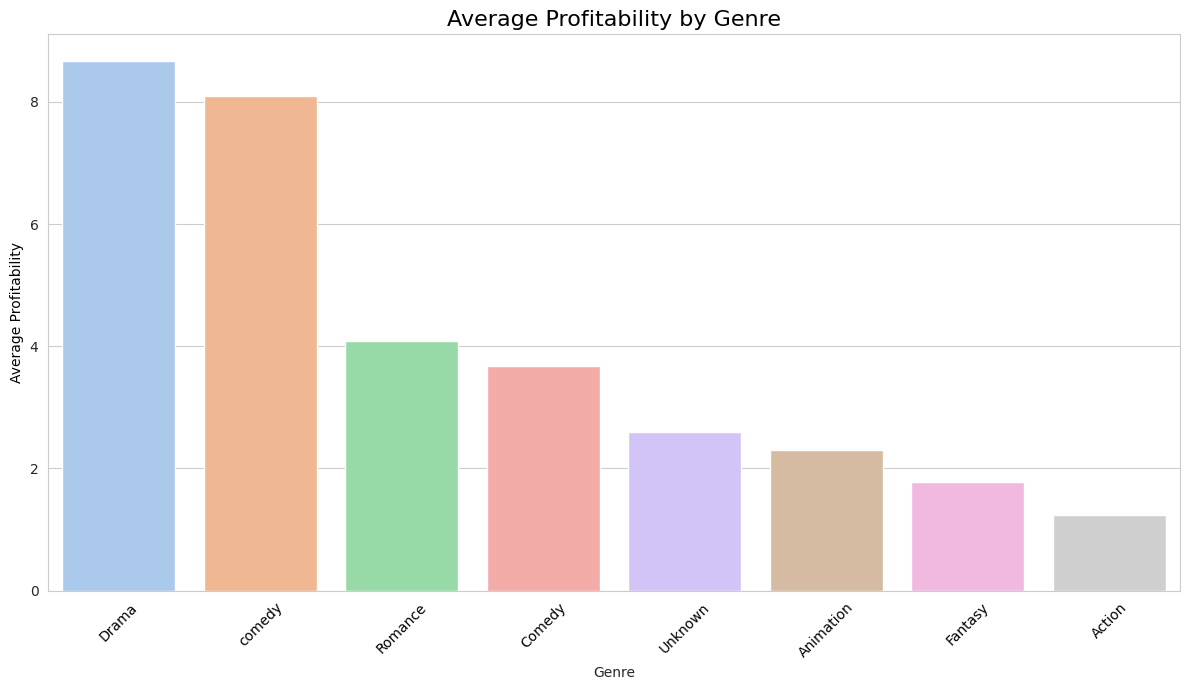

In [ ]:
avg_profitability_by_genre = df.groupby('Genre')['Profitability'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_profitability_by_genre.index, y=avg_profitability_by_genre.values, hue=avg_profitability_by_genre.index, palette='pastel')
plt.title('Average Profitability by Genre', color='Black', fontsize=16)
plt.xticks(rotation=45, color='Black')
plt.ylabel('Average Profitability', color='Black')
plt.tight_layout()
plt.show()

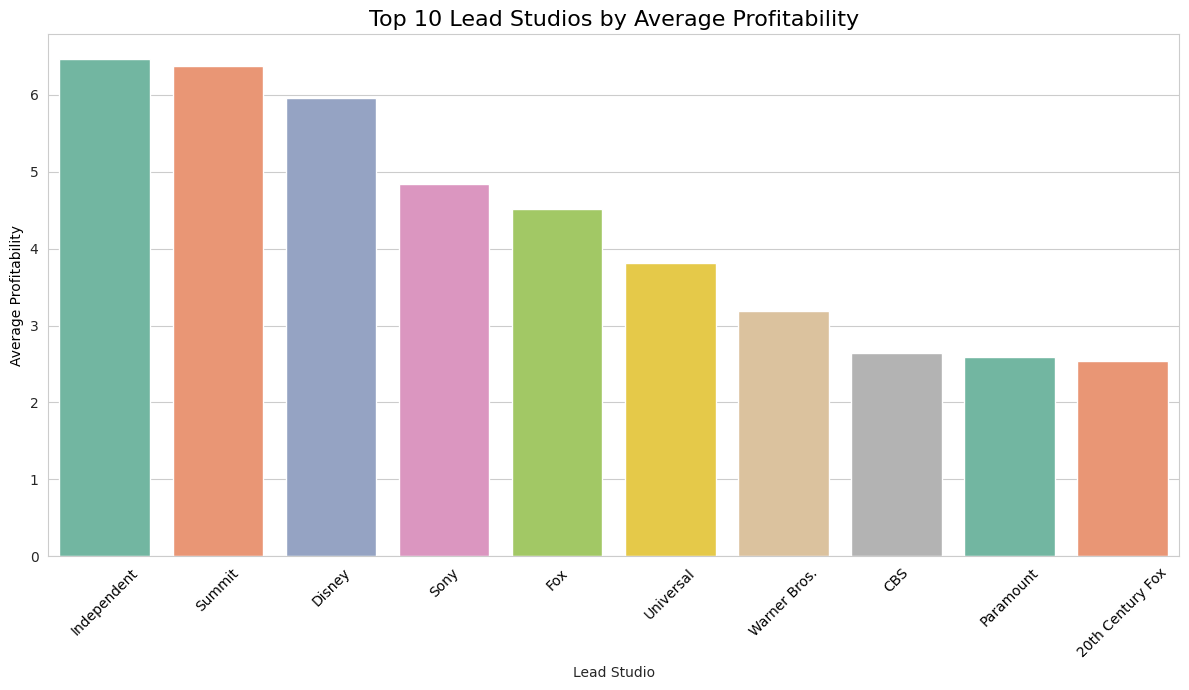

In [ ]:
avg_profitability_by_studio = df.groupby('Lead Studio')['Profitability'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_profitability_by_studio.index, y=avg_profitability_by_studio.values, hue=avg_profitability_by_studio.index, palette='Set2')
plt.title('Top 10 Lead Studios by Average Profitability', color='Black', fontsize=16)
plt.xticks(rotation=45, color='Black')
plt.ylabel('Average Profitability', color='Black')
plt.tight_layout()
plt.show()

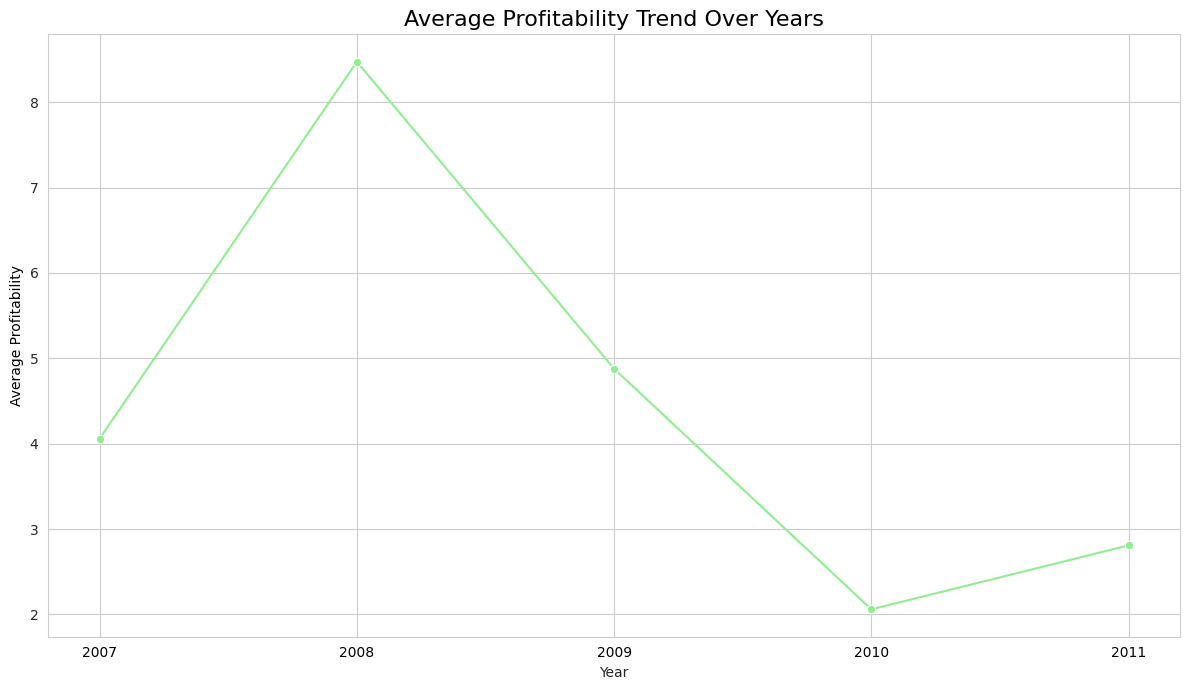

In [ ]:
profitability_by_year = df.groupby('Year')['Profitability'].mean()
plt.figure(figsize=(12, 7))
sns.lineplot(x=profitability_by_year.index, y=profitability_by_year.values, marker='o', color='lightgreen')
plt.title('Average Profitability Trend Over Years', color='Black', fontsize=16)
plt.xticks(profitability_by_year.index, color='Black')
plt.ylabel('Average Profitability', color='Black')
plt.tight_layout()
plt.show()

##3- Ratings Analysis